In [88]:
import pandas as pd
import numpy as np
import os
from os.path import isfile, join

import matplotlib.pyplot as plt
%matplotlib inline

## Carregamento de textos

In [13]:
limited_news_path = r'Software\Fake.br-Corpus' #\fake_10 or \true_10
news_path = r'Software\Fake.br-Corpus\full_texts' #\fake or \true

paths = [limited_news_path, news_path]

In [147]:
def txtToDataframe(path, is_limited=True):
    '''Function for converting full texts to a single DataFrame.'''
    if is_limited:
        true_files = [path+"\\true_10\\"+f for f in sorted(os.listdir(path+'\\true_10')) if isfile(join(path+'\\true_10', f))]
        fake_files = [path+"\\fake_10\\"+f for f in sorted(os.listdir(path+'\\fake_10')) if isfile(join(path+'\\fake_10', f))]
    else:
        true_files = sorted([path+"\\true\\"+f for f in os.listdir(path+'\\true') if isfile(join(path+'\\true', f))])
        fake_files = sorted([path+"\\fake\\"+f for f in os.listdir(path+'\\fake') if isfile(join(path+'\\fake', f))])
    
    texts = []
    labels = []
    
    for file in true_files:
        with open(file, encoding='utf8') as f:
            texts.append(f.read())
            labels.append('true')
    for file in fake_files:
        with open(file, encoding='utf8') as f:
            texts.append(f.read())
            labels.append('fake')
            
    df = pd.DataFrame(list(zip(texts,labels)),columns=['texts','labels'])
    
    # Com esta função, textos e labels foram inseridos em um DataFrame de maneira sequencial. Todas as notícias verdadeiras vêm
    # ANTES do bloco de notícias falsas.
    
    return df

def appendMetadata(path,df, is_limited=True):
    '''Function for appending metadata to previously generated news DataFrame.'''
    if is_limited:
        true_meta = [path+"\\true-meta-information-10\\"+f for f in sorted(os.listdir(path+'\\true-meta-information-10')) if isfile(join(path+'\\true-meta-information-10', f))]
        fake_meta = [path+"\\fake-meta-information-10\\"+f for f in sorted(os.listdir(path+'\\fake-meta-information-10')) if isfile(join(path+'\\fake-meta-information-10', f))]
    else:
        true_meta = sorted([path+"\\true-meta-information\\"+f for f in os.listdir(path+'\\true-meta-information') if isfile(join(path+'\\true-meta-information', f))])
        fake_meta = sorted([path+"\\fake-meta-information\\"+f for f in os.listdir(path+'\\fake-meta-information') if isfile(join(path+'\\fake-meta-information', f))])
    

    #true_meta e fake_meta são listas com todas os paths para arquivos de metadata.
    
    columns = ["author", "source", "category", "date","tokens","words_without_punctuation","types","number_of_links","uppercase_words","verbs","subjuntive_imperative","nouns","adjectives","adverbs","modal_verbs","singular_first_and_second_personal_pronouns","plural_first_personal_pronouns","pronouns","pausality","characters","avg_sentence_length","avg_word_length","percentage_of_spelling_errors","emotiveness","diversity"]
    
    true_metadata = pd.DataFrame(columns=columns)
    fake_metadata = pd.DataFrame(columns=columns)
    
    for file in true_meta:
        #print(file)
        aux = pd.read_csv(file, header=None, sep = '\n').transpose()
        aux.columns = columns
        true_metadata=true_metadata.append(aux)
        
        
    for file in fake_meta:
        #print(file)
        aux = pd.read_csv(file, header=None, sep = '\n').transpose()
        aux.columns = columns
        fake_metadata=fake_metadata.append(aux)
        
    
    metadata = pd.DataFrame(columns=columns)
    metadata = metadata.append(true_metadata,ignore_index=True)
    metadata = metadata.append(fake_metadata,ignore_index=True) 


    complete_df = pd.concat([df,metadata],axis=1)
    # Este DataFrame possui todos os textos/labels (2 colunas) e metadata (25 colunas).
    
    return complete_df

In [148]:
ai = int(input('''0 - Base com 10 notícias verdadeiras e 10 notícias falsas
1 - Base completa de notícias
'''))

path = paths[ai]

if ai == 0:
    data = txtToDataframe(path) # Dataframe contendo notícias e labels.
    complete_data = appendMetadata(path,data) # Dataframe contendo notícias, labels e metadata.
else:
    data = txtToDataframe(path,is_limited=False)
    complete_data = appendMetadata(path,data,is_limited=False)

0 - Base com 10 notícias verdadeiras e 10 notícias falsas
1 - Base completa de notícias
0


In [159]:
ai = int(input('''0 - Base com 10 notícias verdadeiras e 10 notícias falsas
1 - Base completa de notícias
'''))

path = paths[ai]

sorted(os.listdir(path+'\\true_10'))

0 - Base com 10 notícias verdadeiras e 10 notícias falsas
1 - Base completa de notícias
0


['1.txt',
 '10.txt',
 '2.txt',
 '3.txt',
 '4.txt',
 '5.txt',
 '6.txt',
 '7.txt',
 '8.txt',
 '9.txt']

In [149]:
complete_data

,texts,labels,author,source,category,date,tokens,words_without_punctuation,types,number_of_links,...,singular_first_and_second_personal_pronouns,plural_first_personal_pronouns,pronouns,pausality,characters,avg_sentence_length,avg_word_length,percentage_of_spelling_errors,emotiveness,diversity
0,﻿O Podemos decidiu expulsar o deputado federa...,true,Naira Trindade,http://politica.estadao.com.br/blogs/coluna-do...,politica,13/12/2017,168,148,107,None,...,0,0,7,3.33333,761,24.6667,5.14189,0.0,0.134328,0.722973
1,"Bolsonaro é um liberal completo, diz president...",true,Marco Rodrigo Almeida,http://www1.folha.uol.com.br/poder/2018/01/194...,politica,12/1/2018,1028,865,474,None,...,3,1,63,2.85965,4205,15.1754,4.86127,0.00115607,0.271505,0.547977
2,Em evento realizado nesta terça-feira para div...,true,Estadão Conteúdo,http://esportes.estadao.com.br/noticias/futebo...,sociedade_cotidiano,26/12/2017,349,294,182,None,...,0,0,29,2.75,1477,14.7,5.02381,0.0,0.325758,0.619048
3,﻿Após o prefeito de Manaus Arthur Virgílio (PS...,true,Juliana Diógenes,"http://politica.estadao.com.br/noticias/geral,...",politica,26/12/2017,249,204,128,None,...,3,0,8,3.0,1019,13.6,4.9951,0.0147059,0.16,0.627451
4,﻿Doria vai receber Zé Celso após reunião com r...,true,Mônica Bergamo,http://www1.folha.uol.com.br/colunas/monicaber...,politica,11/1/2018,170,147,102,None,...,0,0,7,2.875,700,18.375,4.7619,0.0,0.0694444,0.693878
5,"Gustavo Pedreira Ferraz, que admitiu buscar ma...",true,Luiz Vassallo E Breno Pires,http://politica.estadao.com.br/blogs/fausto-ma...,politica,28/12/2017,389,341,181,None,...,0,0,14,2.66667,1587,18.9444,4.65396,0.00879765,0.11039,0.530792
6,"Muito antes da Operação Lava Jato existir, em ...",true,Liz Batista,"http://acervo.estadao.com.br/noticias/acervo,p...",politica,25/11/2015,315,283,185,None,...,0,0,11,2.90909,1407,25.7273,4.97173,0.0106007,0.174242,0.65371
7,Ministério Público do Maranhão (MP-MA) ingress...,true,G1 MA,https://g1.globo.com/ma/maranhao/noticia/minis...,sociedade_cotidiano,27/11/2017,502,459,239,None,...,0,0,9,2.86667,2255,30.6,4.91285,0.00653595,0.122449,0.520697
8,Cuba comemorará o primeiro aniversário da mort...,true,Reuters,https://g1.globo.com/mundo/noticia/cuba-presta...,politica,24/11/2017,482,441,265,None,...,0,0,33,2.41176,2132,25.9412,4.83447,0.0,0.237569,0.600907
9,s doleiros acusados de lavar dinheiro roubado ...,true,"Bruno Albernaz,",https://g1.globo.com/rj/rio-de-janeiro/noticia...,politica,28/12/2017,264,234,147,None,...,0,0,5,2.72727,1146,21.2727,4.89744,0.0,0.0841122,0.628205


## Analisando Base de notícias

TypeError: 'value' must be an instance of str or bytes, not a float

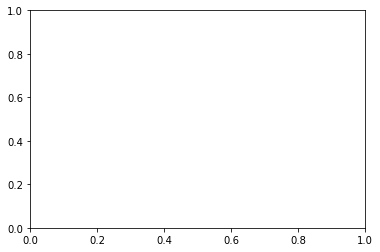

In [96]:
# Verificando assuntos

plt.hist(complete_data['characters'],density=False)